In [1]:
#Importing required packages and files
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import os
import ds_fun

#These imports were constructed

#Tools to build machine learning models and reports
from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans

#Removes warnings and imporves asthenics
import warnings
#warnings.filterwarnings("ignore")

#Sets an option to show all columns
pd.options.display.max_columns = None
pd.options.display.width = 100
pd.options.display.max_colwidth = None
pd.options.display.max_rows = 200

"""############## -- AVAILABLE FUNCTIONS -- ##############
Acquire:
- wrangle_iris()
- wrangle_mall()
- get_telco_data()
- wrangle_zillow()

Prepare:
- train_validate(df, stratify_col = None, random_seed=1969)
- get_dummies(df, dumb_columns)
- find_na(df)
- outlier_ejector(dataframe, column, k=1.5)
- outlier_detector(dataframe, column, k=1.5)
- handle_missing_values(df, prop_required_column = .4, prop_required_row = .25)

Explore:
- exploring_cats(train, target_column, alpha = 0.05)
- elbow_method(df, cluster_list)
- display_clusters(df, cluster_list, n_clusters=3)
- check_p_val(p_val, h0, ha, s=None, alpha=0.05)
- explore_relationships(feature_list, train, target_col, visuals = False)
- correlation_test(df, target_col, alpha=0.05)

Modeling:
- encode_and_dummies(df, target_column = None ,random_seed=1969)
- train_val_test(train, val, test, target_col)
- find_regression_baseline(y_train)
- scale_cont_columns(train, val, test, scaler_model = 1, cont_columns)

https://www.sciencedirect.com/science/article/abs/pii/S0167923609001377?via%3Dihub

https://data.world/food/wine-quality

Initial takeaways:
- No null values
- 3x as many white as red wines
- Target = quality, ranging from 3 to 9 (whole numbers)

Background info on the wine: https://winefolly.com/deep-dive/vinho-verde-the-perfect-poolside-wine-from-portugal/

Acidity: https://winemakersacademy.com/understanding-wine-acidity/

Sulpher Dioxide: https://www.piwine.com/media/home-wine-making-basics/using_sulfur_dioxide.pdf

Chlorides: Contribute to saltyness

In [2]:
def pour_wine():
    """ 
    This function takes the red and white wine quality csvs, adds a type column and combines into the wine DataFrame.
    """

    
    filename = "winequality.csv"
    
    if os.path.isfile(filename):
        return pd.read_csv(filename)
    else:
        red_df = pd.read_csv("winequality-red.csv")
        white_df = pd.read_csv("winequality-white.csv")

        red_df['type'] = 'red'
        white_df['type'] = 'white'

        wine_df = pd.concat([red_df, white_df], ignore_index=True)

        wine_df.to_csv(filename, index=False)
    
    return wine_df

In [3]:
wine_df = pour_wine()

In [4]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
wine_df.shape

(6497, 13)

In [6]:
wine_df = pd.read_csv("winequality.csv")

In [7]:
wine_df.shape

(6497, 13)

In [8]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [9]:
wine_df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [10]:
train, val, test = ds_fun.train_validate(wine_df, random_seed=1969)

In [11]:
train.shape

(3118, 13)

In [12]:
cat_columns = ['type', 'quality']


In [13]:
train[train.type == 'white'].describe().T - train[train.type == 'red'].describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1594.0,-1.397261,-0.799734,-0.70000,-0.800000,-1.1000,-1.8000,-1.40000
volatile acidity,1594.0,-0.240689,-0.083590,-0.03500,-0.170000,-0.2500,-0.3000,-0.40000
citric acid,1594.0,0.062303,-0.069456,0.00000,0.170000,0.0600,-0.0300,0.47000
residual sugar,1594.0,3.763537,3.509500,-0.30000,-0.200000,3.0000,7.0000,5.20000
chlorides,1594.0,-0.042180,-0.025179,-0.00300,-0.034000,-0.0360,-0.0410,-0.07600
free sulfur dioxide,1594.0,19.312150,6.225712,1.00000,16.000000,20.0000,25.0000,74.50000
total sulfur dioxide,1594.0,90.713576,7.880575,3.00000,85.000000,96.0000,105.0000,55.00000
density,1594.0,-0.002699,0.001073,-0.00294,-0.003852,-0.0029,-0.0017,-0.00079
pH,1594.0,-0.126589,-0.000106,-0.14000,-0.120000,-0.1300,-0.1300,-0.08000
sulphates,1594.0,-0.175047,-0.049071,-0.11000,-0.150000,-0.1600,-0.1900,-0.87000


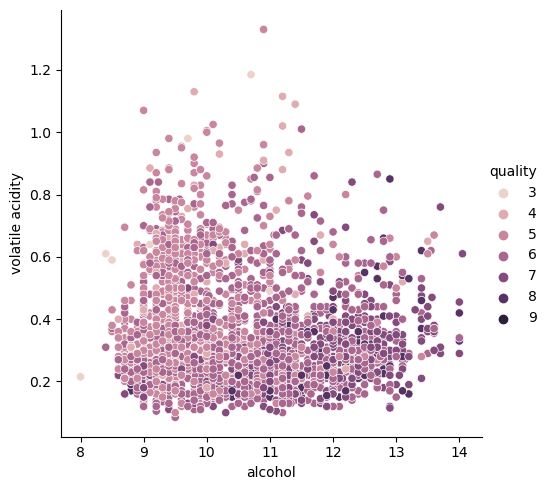

In [14]:
sns.relplot(data=train, x='alcohol', y = 'volatile acidity', hue='quality')


Takeaways:
- Alcohol content has a positive correlation with quality
- Higher density is inversly related to higher alcohol content.
- Higher total sulfur dioxide is weakly inversly related to higher alcohol content.
- Higher residual sugar is inversly related to higher alcohol content
- Higher volatile acidity might have a negative correlation with quality
- Whites have a lower density than reds
- Whites have a lower fixed acidity than reds
- Whites have a lower volatile acidity than reds
- Whites have a lower pH than reds
- Whites have lower sulphates than reds
- Reds have low residual sugar
- Whites tend to have lower chlorides
- Reds have low free/total sulfur dioxide

- It seems whites and reds should be studied seperatly. They will have different drivers of quality.

Note: 
- Is free sulfur dioxide captured by total sulfur dioxide? If so then its being double counted.


In [15]:
wine_df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


Traditionally total acidity is divided into two groups, namely the volatile acids (see separate description) and the nonvolatile or fixed acids.

The predominant fixed acids found in wines are tartaric, malic, citric, and succinic.

- https://waterhouse.ucdavis.edu/whats-in-wine/fixed-acidity

Sweetness in wine is called residual sugar and is usually measured in grams per litre (g/L). Residual sugar or 'RS' is from the natural grape sugars left in a wine after the alcoholic fermentation finishes.

It is impossible to get residual sugar levels down to absolute zero at the end of fermentation, and there will be small amounts of both glucose and fructose remaining in a dry wine. The residual sugar remaining in a dry wine is usually around 0.3 to 2 g/L.

- https://whicherridge.com.au/blog/what-is-residual-sugar-in-wine/#:~:text=Sweetness%20in%20wine%20is%20called,the%20sweeter%20the%20wine%20is.

Sulphur dioxide

The bound forms are "inactive" and do not contribute to any antioxidant or antimicrobial properties in the wine. The free form of SO2 is the active form and contributes to the wine's stability. The two forms together (free plus bound) equals the total SO2 in the wine.

- https://extension.psu.edu/sulfur-dioxide-management#:~:text=Sulfur%20dioxide%20is%20the%20primary,atoms%20of%20oxygen%20(O).

In [16]:
train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'type'],
      dtype='object')

In [17]:
cont_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

In [18]:
train, val, test = ds_fun.scale_cont_columns(train, val, test , cont_columns, scaler_model = 2)

In [19]:
cluster_list = [ 'density', 'volatile acidity', 'chlorides', 'alcohol']

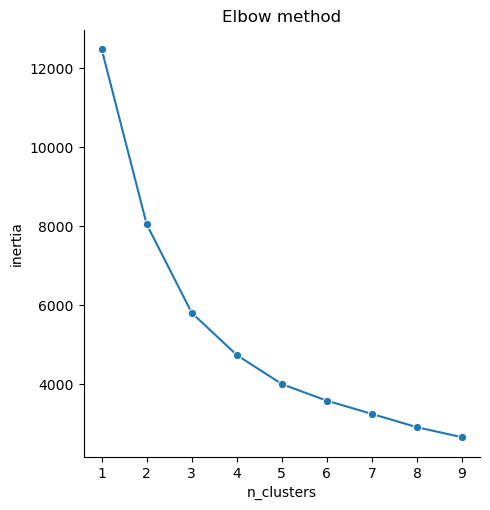

In [20]:
ds_fun.elbow_method(train, cluster_list)

In [21]:
n_clusters = 3

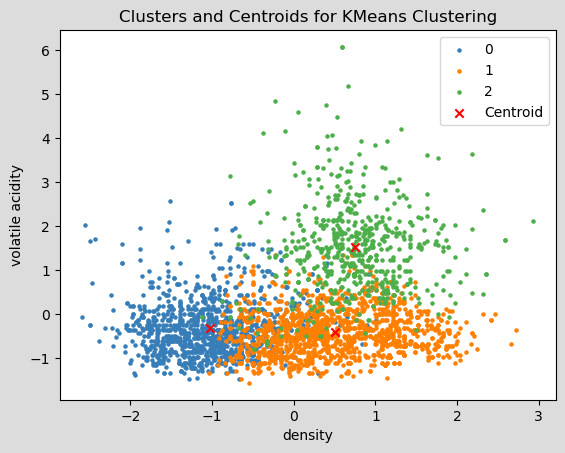

In [22]:
ds_fun.display_clusters(train, cluster_list, n_clusters=n_clusters)

In [23]:
cluster_list1 = ['chlorides', 'alcohol']

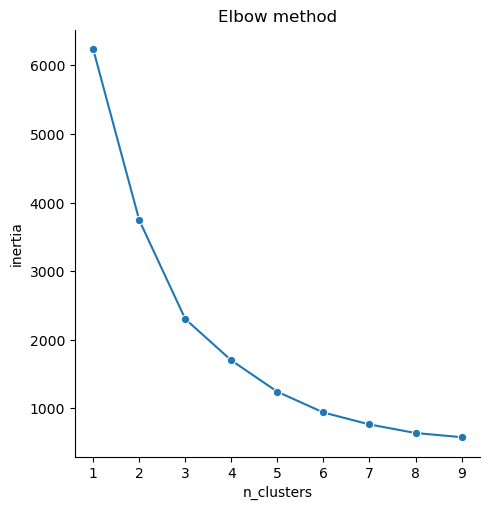

In [24]:
ds_fun.elbow_method(train, cluster_list1)

In [25]:
n_clusters1 = 2

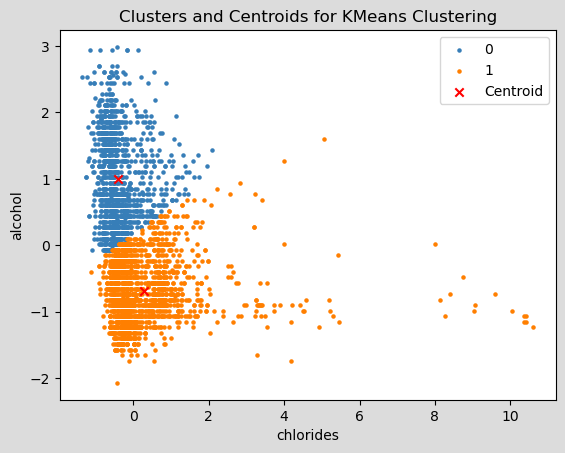

In [26]:
ds_fun.display_clusters(train, cluster_list1, n_clusters=n_clusters1)

In [27]:
X = train.copy()

#Builds the cluster object with the desired number of clusters
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(train[cluster_list])

#Builds a column with the cluster numbers
X['cluster_preds'] = kmeans.predict(X[cluster_list])

In [28]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,cluster_preds
3094,0.317173,-0.304650,1.174375,0.910623,-0.747596,0.820105,1.412104,-0.297422,-0.551300,-1.023046,1.522336,7,white,1
2509,-0.716997,-0.059039,-0.856130,0.087509,-0.457890,-0.389138,0.476850,-0.142812,-0.424505,0.664138,-0.483592,5,white,2
4420,-0.478343,0.370778,0.964323,0.174152,0.005640,0.647356,2.188542,0.733310,1.794399,0.461676,-0.483592,5,white,2
2677,-0.557894,-0.488857,0.124114,2.361904,-0.139213,1.453518,1.412104,1.970187,1.731001,-0.753097,-0.567172,5,white,2
2507,0.635379,-0.673065,0.334166,0.910623,-0.052301,-0.446721,0.741544,1.128423,0.653248,-0.415660,-0.567172,4,white,2


In [29]:
X[X.cluster_preds == 0].describe().T - X[X.cluster_preds == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,-525.0,0.980756,0.432962,1.113722,0.696076,0.795516,1.193273,1.113722
volatile acidity,-525.0,1.834544,0.359057,0.675428,1.596466,1.903479,2.026284,3.499945
citric acid,-525.0,-0.541694,0.556486,0.000000,-1.400349,-0.630157,0.070017,-2.870715
residual sugar,-525.0,-0.065968,-0.081494,0.043322,0.086644,0.021661,-0.379066,-0.595675
chlorides,-525.0,1.691819,1.235142,0.550442,1.245736,1.361619,1.593384,8.053830
free sulfur dioxide,-525.0,-0.633755,-0.101586,0.057583,-0.633413,-0.806162,-0.748579,-3.771687
total sulfur dioxide,-525.0,-0.814245,0.194034,-0.017646,-1.094072,-1.111718,-0.754380,-0.979371
density,-525.0,1.770185,0.015004,1.467074,1.791755,1.759115,1.756538,1.889674
pH,-525.0,0.500620,-0.006523,0.190192,0.507178,0.507178,0.570575,-1.331343
sulphates,-525.0,0.859519,0.192446,0.202462,0.877336,0.877336,0.809848,5.533963


In [30]:
X[X.cluster_preds == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,600.0,0.653278,1.195112,-1.512513,-0.180024,0.396724,1.271792,6.681297
volatile acidity,600.0,1.524328,0.994386,-0.795870,0.861999,1.476024,2.028647,6.081215
citric acid,600.0,-0.513862,1.337279,-2.256479,-1.696340,-0.646078,0.404183,3.484950
residual sugar,600.0,-0.477787,0.544660,-0.995537,-0.757267,-0.670623,-0.518997,2.632665
chlorides,600.0,1.206375,1.599500,-0.805537,0.527111,0.816817,1.251376,10.608884
free sulfur dioxide,600.0,-0.680364,0.780650,-1.598381,-1.252883,-0.907385,-0.331555,2.893093
total sulfur dioxide,600.0,-0.916195,0.896311,-1.958342,-1.587769,-1.217197,-0.453994,2.382652
density,600.0,0.747196,0.580621,-1.122007,0.394886,0.733310,1.088053,2.932203
pH,600.0,0.469290,0.982533,-2.833601,-0.170916,0.463056,1.097029,2.998947
sulphates,600.0,0.621846,1.118136,-1.900382,-0.010736,0.461676,1.069062,9.572469


In [31]:
X[X.cluster_preds == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1125.0,-0.327478,0.762150,-2.626235,-0.876100,-0.398791,0.078518,5.567575
volatile acidity,1125.0,-0.310217,0.635329,-1.471298,-0.734467,-0.427455,0.002363,2.581270
citric acid,1125.0,0.027832,0.780793,-2.256479,-0.295991,-0.015921,0.334166,6.355665
residual sugar,1125.0,-0.411819,0.626154,-1.038859,-0.843910,-0.692284,-0.139931,3.228340
chlorides,1125.0,-0.485444,0.364358,-1.355979,-0.718625,-0.544802,-0.342007,2.555054
free sulfur dioxide,1125.0,-0.046608,0.882236,-1.655964,-0.619470,-0.101223,0.417024,6.664780
total sulfur dioxide,1125.0,-0.101950,0.702277,-1.940696,-0.493698,-0.105479,0.300386,3.362022
density,1125.0,-1.022990,0.565618,-2.589081,-1.396869,-1.025805,-0.668485,1.042529
pH,1125.0,-0.031330,0.989056,-3.023793,-0.678095,-0.044122,0.526453,4.330289
sulphates,1125.0,-0.237673,0.925690,-2.102844,-0.888071,-0.415660,0.259214,4.038506


In [32]:
dummy_df = pd.get_dummies(train[['type']])
train = pd.concat([train, dummy_df], axis=1)
train.drop(columns=['type'], inplace = True) 

In [33]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster_preds,type_red,type_white
3094,0.317173,-0.304650,1.174375,0.910623,-0.747596,0.820105,1.412104,-0.297422,-0.551300,-1.023046,1.522336,7,8,0,1
2509,-0.716997,-0.059039,-0.856130,0.087509,-0.457890,-0.389138,0.476850,-0.142812,-0.424505,0.664138,-0.483592,5,1,0,1
4420,-0.478343,0.370778,0.964323,0.174152,0.005640,0.647356,2.188542,0.733310,1.794399,0.461676,-0.483592,5,1,0,1
2677,-0.557894,-0.488857,0.124114,2.361904,-0.139213,1.453518,1.412104,1.970187,1.731001,-0.753097,-0.567172,5,1,0,1
2507,0.635379,-0.673065,0.334166,0.910623,-0.052301,-0.446721,0.741544,1.128423,0.653248,-0.415660,-0.567172,4,1,0,1


In [34]:
target_col = 'type_red'

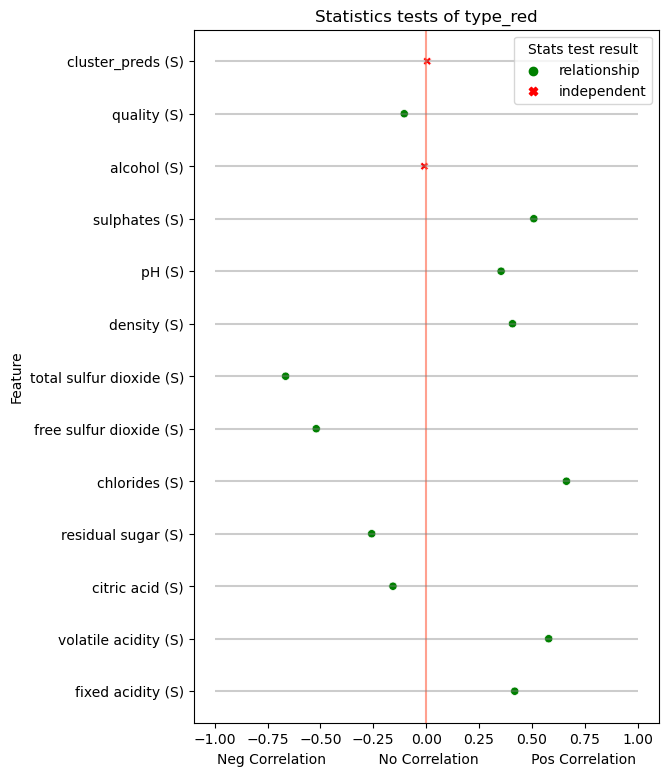

In [35]:
ds_fun.correlation_test(train, 'type_red', alpha=0.05)

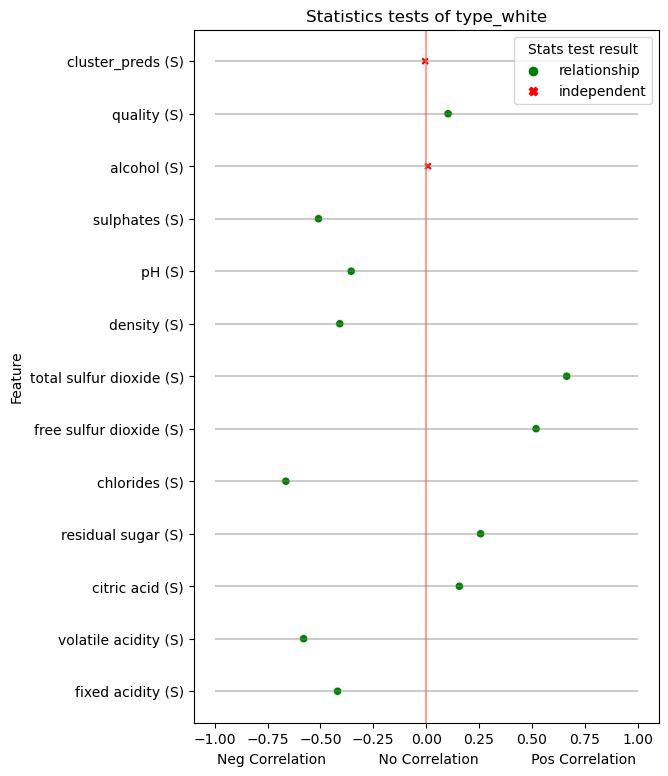

In [36]:
ds_fun.correlation_test(train, 'type_white', alpha=0.05)

In [37]:
feature_list = ['alcohol']
target_col = 'quality'

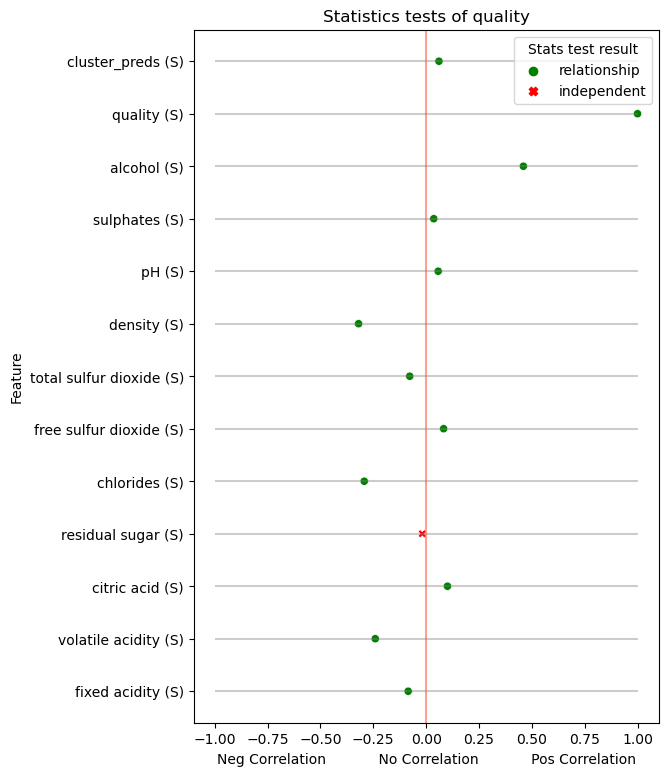

In [38]:
ds_fun.correlation_test(train, 'quality', alpha=0.05)

In [39]:
cluster_list = [ 'density', 'volatile acidity', 'chlorides', 'alcohol']

In [40]:
n_clusters = 2

In [41]:
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(train[cluster_list])

#Builds a column with the cluster numbers
train['cluster_preds'] = kmeans.predict(train[cluster_list])

(array([ 26., 218., 419., 491., 491., 645., 521., 232.,  67.,   8.]),
 array([-2.5890813 , -2.03695283, -1.48482437, -0.9326959 , -0.38056744,
         0.17156102,  0.72368949,  1.27581795,  1.82794642,  2.38007488,
         2.93220334]),
 <BarContainer object of 10 artists>)

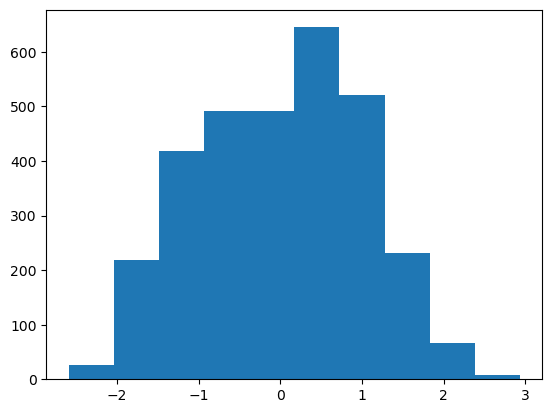

In [42]:
plt.hist(train.density)

(array([1829., 1046.,  174.,   33.,   15.,    7.,    0.,    2.,    5.,
           7.]),
 array([-1.35597886, -0.1594926 ,  1.03699366,  2.23347991,  3.42996617,
         4.62645242,  5.82293868,  7.01942493,  8.21591119,  9.41239745,
        10.6088837 ]),
 <BarContainer object of 10 artists>)

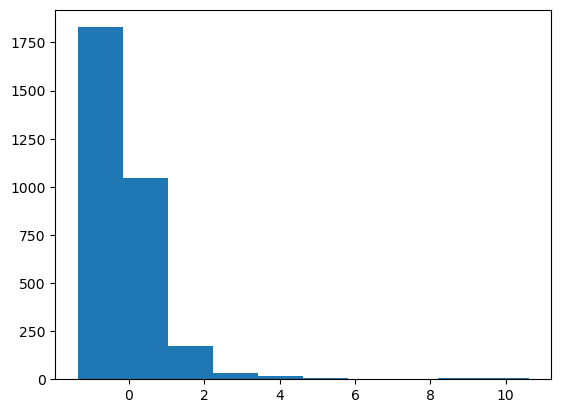

In [43]:
plt.hist(train.chlorides)

(array([ 23., 458., 722., 489., 493., 344., 260., 223.,  75.,  31.]),
 array([-2.07161842, -1.56595734, -1.06029627, -0.55463519, -0.04897411,
         0.45668696,  0.96234804,  1.46800911,  1.97367019,  2.47933127,
         2.98499234]),
 <BarContainer object of 10 artists>)

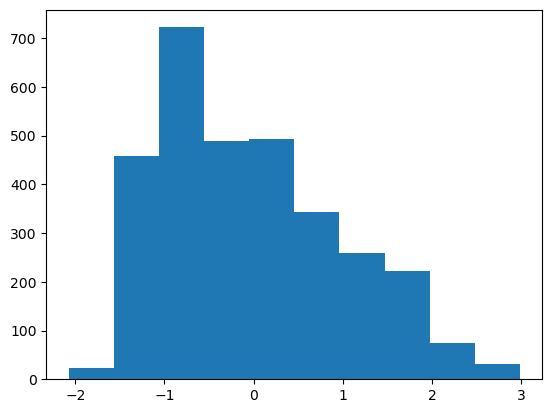

In [44]:
plt.hist(train.alcohol)

(array([ 534., 1391.,  606.,  274.,  206.,   61.,   29.,   11.,    4.,
           2.]),
 array([-1.56340178, -0.79894008, -0.03447838,  0.72998333,  1.49444503,
         2.25890673,  3.02336843,  3.78783014,  4.55229184,  5.31675354,
         6.08121525]),
 <BarContainer object of 10 artists>)

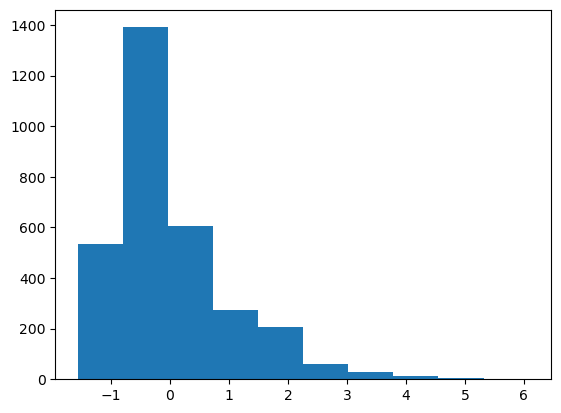

In [45]:
plt.hist(train['volatile acidity'])

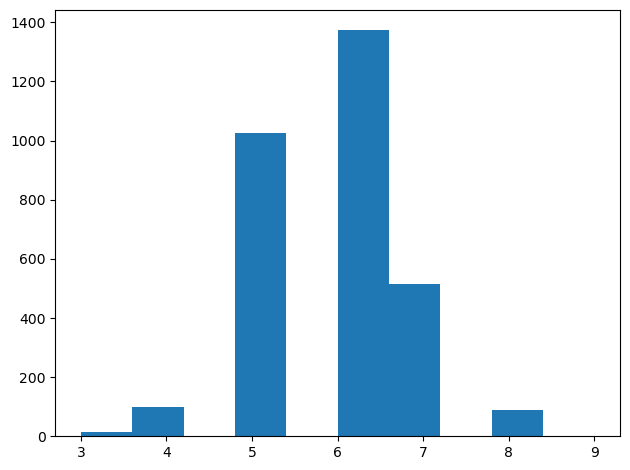

In [46]:
plt.hist(train.quality)
plt.tight_layout()